In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

pd.options.display.max_columns=None

from math import sqrt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

C:\Users\user\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df = pd.read_csv('sun_weather.csv')
df

,날짜,5Hr,6Hr,7Hr,8Hr,9Hr,10Hr,11Hr,12Hr,13Hr,14Hr,15Hr,16Hr,17Hr,18Hr,19Hr,20Hr,충전시간발전량,일출시간,일몰시간,강수량5hr,강수량6hr,강수량7hr,강수량8hr,강수량9hr,강수량10hr,강수량11hr,강수량12hr,강수량13hr,강수량14hr,강수량15hr,강수량16hr,강수량17hr,강수량18hr,강수량19hr,강수량20hr,습도5hr,습도6hr,습도7hr,습도8hr,습도9hr,습도10hr,습도11hr,습도12hr,습도13hr,습도14hr,습도15hr,습도16hr,습도17hr,습도18hr,습도19hr,습도20hr,풍속5hr,풍속6hr,풍속7hr,풍속8hr,풍속9hr,풍속10hr,풍속11hr,풍속12hr,풍속13hr,풍속14hr,풍속15hr,풍속16hr,풍속17hr,풍속18hr,풍속19hr,풍속20hr,기온5hr,기온6hr,기온7hr,기온8hr,기온9hr,기온10hr,기온11hr,기온12hr,기온13hr,기온14hr,기온15hr,기온16hr,기온17hr,기온18hr,기온19hr,기온20hr
0,160701,0.0,2.5,36.9,44.4,29.2,59.3,33.9,9.2,28.4,1.3,1.1,7.3,1.5,0.2,0.0,0,140.5,524,1949,3.200000,15.7,4.7,0.0,0.0,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.3,2.1,1.0,0.0,93.0,94.0,95.0,95.0,94.0,93.0,92.0,91.0,90.0,91.0,92.0,93.0,94.0,94.0,95.0,96.0,4.3,2.5,2.7,1.8,2.6,2.4,3.0,1.9,1.5,1.7,3.0,3.7,4.4,5.6,4.9,4.8,22.600000,22.200001,22.299999,23.900000,24.500000,24.299999,24.100000,23.600000,24.299999,24.200001,24.700001,24.500000,24.200001,22.799999,22.400000,22.200001
1,160702,0.0,7.3,24.4,30.1,31.4,57.0,1.1,1.8,5.9,27.3,111.2,72.5,16.8,15.4,4.8,0,276.8,524,1949,16.799999,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.1,0.0,0.0,96.0,96.0,94.0,93.0,95.0,94.0,95.0,96.0,95.0,96.0,95.0,95.0,90.0,96.0,95.0,96.0,1.6,1.6,3.0,4.9,5.1,2.9,1.3,0.5,1.1,3.5,2.2,1.5,2.6,1.6,1.6,0.3,22.799999,22.799999,23.200001,22.299999,21.200001,21.299999,20.299999,21.000000,21.000000,20.400000,20.400000,20.600000,19.900000,20.700001,20.100000,20.000000
2,160703,0.0,0.0,14.0,16.9,39.7,17.1,10.4,53.9,23.1,3.3,0.0,0.0,0.0,4.6,0.1,0,107.8,525,1948,0.000000,2.5,8.2,5.5,1.7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,92.0,94.0,95.0,95.0,96.0,96.0,95.0,95.0,95.0,95.0,96.0,96.0,96.0,96.0,96.0,96.0,3.2,1.9,2.0,3.7,2.7,2.2,1.0,1.2,0.7,1.3,1.9,0.6,0.5,0.4,0.2,0.1,21.200001,21.000000,20.700001,20.500000,21.000000,20.799999,21.000000,21.400000,21.700001,22.000000,22.100000,22.100000,22.200001,22.299999,22.200001,22.299999
3,160704,0.0,0.0,0.0,0.0,8.4,50.7,64.2,146.0,276.5,181.0,146.1,148.4,24.4,9.8,0.5,0,1012.9,525,1948,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88.0,87.0,86.0,90.0,91.0,92.0,94.0,95.0,96.0,96.0,95.0,95.0,96.0,96.0,96.0,96.0,2.5,1.3,2.5,2.7,0.9,1.7,2.1,0.9,0.8,0.7,0.4,0.1,0.6,0.4,0.3,0.9,24.900000,26.000000,26.400000,24.700001,24.799999,23.900000,23.799999,23.600000,23.600000,23.000000,22.900000,22.700001,22.700001,22.799999,22.600000,22.500000
4,160705,0.0,13.8,74.7,147.0,177.9,306.2,347.2,389.1,302.7,292.2,184.8,153.4,84.0,48.0,1.0,0,1975.6,526,1948,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7,0.2,81.0,81.0,83.0,81.0,83.0,87.0,90.0,91.0,92.0,94.0,94.0,95.0,95.0,94.0,95.0,96.0,3.0,2.8,3.2,3.5,3.9,2.7,2.2,3.0,2.2,3.0,3.6,2.6,2.3,1.2,3.0,1.4,27.500000,27.700001,26.799999,27.900000,27.000000,26.400000,25.900000,25.600000,24.900000,24.900000,24.500000,23.600000,24.400000,24.600000,24.500000,24.400000
5,160706,0.0,18.8,66.1,210.4,226.4,360.6,373.4,380.5,411.6,309.9,280.0,128.3,80.9,40.0,4.2,0,2244.3,526,1948,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,80.0,82.0,79.0,83.0,86.0,88.0,91.0,93.0,94.0,94.0,96.0,96.0,96.0,96.0,96.0,96.0,3.4,2.2,2.6,2.9,1.9,2.7,1.8,1.1,0.9,1.0,1.3,0.6,0.1,0.1,0.1,0.2,28.500000,28.400000,29.200001,27.600000,26.500000,26.400000,25.799999,24.700001,24.500000,24.000000,22.500000,22.600000,22.900000,22.900000,22.400000,22.200001
6,160707,0.0,11.5,49.9,139.7,186.4,210.7,299.6,369.8,361.0,356.6,279.8,128.4,125.2,28.9,2.0,0,2005.9,527,1948,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,83.0,83.0,83.0,84.0,86.0,89.0,92.0,92.0,93.0,93.0,95.0,93.0,93.0,93.0,94.0,93.0,2.7,2.7,2.9,2.3,2.1,1.1,0.8,1.3,1.2,0.8,1.7,0.7,0.5,0.8,1.4,0.9,27.200001,26.600000,26.600000,26.500000,25.700001,24.600000,23.600000,23.700001,23.400000,23.100000,23.000000,23.299999,23.200001,23.200001,23.400000,23.700001
7,160708,0.0,14.9,85.7,196.1,286.8,360.0,316.1,213.3,368.9,374.2,309.2,219.2,115.3,25.5,0.9,0,2160.9,527,1948,0.000000,0.0,0.0,0.0,0.0,0.

In [3]:
#날짜 컬럼 date데이터로 변환
df['날짜'] = pd.to_datetime(df['날짜'], format='%y%m%d')
df.head()

,날짜,5Hr,6Hr,7Hr,8Hr,9Hr,10Hr,11Hr,12Hr,13Hr,14Hr,15Hr,16Hr,17Hr,18Hr,19Hr,20Hr,충전시간발전량,일출시간,일몰시간,강수량5hr,강수량6hr,강수량7hr,강수량8hr,강수량9hr,강수량10hr,강수량11hr,강수량12hr,강수량13hr,강수량14hr,강수량15hr,강수량16hr,강수량17hr,강수량18hr,강수량19hr,강수량20hr,습도5hr,습도6hr,습도7hr,습도8hr,습도9hr,습도10hr,습도11hr,습도12hr,습도13hr,습도14hr,습도15hr,습도16hr,습도17hr,습도18hr,습도19hr,습도20hr,풍속5hr,풍속6hr,풍속7hr,풍속8hr,풍속9hr,풍속10hr,풍속11hr,풍속12hr,풍속13hr,풍속14hr,풍속15hr,풍속16hr,풍속17hr,풍속18hr,풍속19hr,풍속20hr,기온5hr,기온6hr,기온7hr,기온8hr,기온9hr,기온10hr,기온11hr,기온12hr,기온13hr,기온14hr,기온15hr,기온16hr,기온17hr,기온18hr,기온19hr,기온20hr
0,2016-07-01,0.0,2.5,36.9,44.4,29.2,59.3,33.9,9.2,28.4,1.3,1.1,7.3,1.5,0.2,0.0,0,140.5,524,1949,3.200000,15.7,4.7,0.0,0.0,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.3,2.1,1.0,0.0,93.0,94.0,95.0,95.0,94.0,93.0,92.0,91.0,90.0,91.0,92.0,93.0,94.0,94.0,95.0,96.0,4.3,2.5,2.7,1.8,2.6,2.4,3.0,1.9,1.5,1.7,3.0,3.7,4.4,5.6,4.9,4.8,22.600000,22.200001,22.299999,23.900000,24.500000,24.299999,24.100000,23.6,24.299999,24.200001,24.700001,24.500000,24.200001,22.799999,22.400000,22.200001
1,2016-07-02,0.0,7.3,24.4,30.1,31.4,57.0,1.1,1.8,5.9,27.3,111.2,72.5,16.8,15.4,4.8,0,276.8,524,1949,16.799999,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.1,0.0,0.0,96.0,96.0,94.0,93.0,95.0,94.0,95.0,96.0,95.0,96.0,95.0,95.0,90.0,96.0,95.0,96.0,1.6,1.6,3.0,4.9,5.1,2.9,1.3,0.5,1.1,3.5,2.2,1.5,2.6,1.6,1.6,0.3,22.799999,22.799999,23.200001,22.299999,21.200001,21.299999,20.299999,21.0,21.000000,20.400000,20.400000,20.600000,19.900000,20.700001,20.100000,20.000000
2,2016-07-03,0.0,0.0,14.0,16.9,39.7,17.1,10.4,53.9,23.1,3.3,0.0,0.0,0.0,4.6,0.1,0,107.8,525,1948,0.000000,2.5,8.2,5.5,1.7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,92.0,94.0,95.0,95.0,96.0,96.0,95.0,95.0,95.0,95.0,96.0,96.0,96.0,96.0,96.0,96.0,3.2,1.9,2.0,3.7,2.7,2.2,1.0,1.2,0.7,1.3,1.9,0.6,0.5,0.4,0.2,0.1,21.200001,21.000000,20.700001,20.500000,21.000000,20.799999,21.000000,21.4,21.700001,22.000000,22.100000,22.100000,22.200001,22.299999,22.200001,22.299999
3,2016-07-04,0.0,0.0,0.0,0.0,8.4,50.7,64.2,146.0,276.5,181.0,146.1,148.4,24.4,9.8,0.5,0,1012.9,525,1948,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88.0,87.0,86.0,90.0,91.0,92.0,94.0,95.0,96.0,96.0,95.0,95.0,96.0,96.0,96.0,96.0,2.5,1.3,2.5,2.7,0.9,1.7,2.1,0.9,0.8,0.7,0.4,0.1,0.6,0.4,0.3,0.9,24.900000,26.000000,26.400000,24.700001,24.799999,23.900000,23.799999,23.6,23.600000,23.000000,22.900000,22.700001,22.700001,22.799999,22.600000,22.500000
4,2016-07-05,0.0,13.8,74.7,147.0,177.9,306.2,347.2,389.1,302.7,292.2,184.8,153.4,84.0,48.0,1.0,0,1975.6,526,1948,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7,0.2,81.0,81.0,83.0,81.0,83.0,87.0,90.0,91.0,92.0,94.0,94.0,95.0,95.0,94.0,95.0,96.0,3.0,2.8,3.2,3.5,3.9,2.7,2.2,3.0,2.2,3.0,3.6,2.6,2.3,1.2,3.0,1.4,27.500000,27.700001,26.799999,27.900000,27.000000,26.400000,25.900000,25.6,24.900000,24.900000,24.500000,23.600000,24.400000,24.600000,24.500000,24.400000


In [4]:
df.dtypes

날짜         datetime64[ns]
5Hr               float64
6Hr               float64
7Hr               float64
8Hr               float64
9Hr               float64
10Hr              float64
11Hr              float64
12Hr              float64
13Hr              float64
14Hr              float64
15Hr              float64
16Hr              float64
17Hr              float64
18Hr              float64
19Hr              float64
20Hr                int64
충전시간발전량           float64
일출시간                int64
일몰시간                int64
강수량5hr            float64
강수량6hr            float64
강수량7hr            float64
강수량8hr            float64
강수량9hr            float64
강수량10hr           float64
강수량11hr           float64
강수량12hr           float64
강수량13hr           float64
강수량14hr           float64
                ...      
풍속7hr             float64
풍속8hr             float64
풍속9hr             float64
풍속10hr            float64
풍속11hr            float64
풍속12hr            float64
풍속13hr            float64
풍속14hr      

df = df.set_index('날짜')
df.head()

In [5]:
df=df.drop(df.columns[0:16], axis=1)

In [6]:
df.columns

Index(['20Hr', '충전시간발전량', '일출시간', '일몰시간', '강수량5hr', '강수량6hr', '강수량7hr',
       '강수량8hr', '강수량9hr', '강수량10hr', '강수량11hr', '강수량12hr', '강수량13hr',
       '강수량14hr', '강수량15hr', '강수량16hr', '강수량17hr', '강수량18hr', '강수량19hr',
       '강수량20hr', '습도5hr', '습도6hr', '습도7hr', '습도8hr', '습도9hr', '습도10hr',
       '습도11hr', '습도12hr', '습도13hr', '습도14hr', '습도15hr', '습도16hr', '습도17hr',
       '습도18hr', '습도19hr', '습도20hr', '풍속5hr', '풍속6hr', '풍속7hr', '풍속8hr',
       '풍속9hr', '풍속10hr', '풍속11hr', '풍속12hr', '풍속13hr', '풍속14hr', '풍속15hr',
       '풍속16hr', '풍속17hr', '풍속18hr', '풍속19hr', '풍속20hr', '기온5hr', '기온6hr',
       '기온7hr', '기온8hr', '기온9hr', '기온10hr', '기온11hr', '기온12hr', '기온13hr',
       '기온14hr', '기온15hr', '기온16hr', '기온17hr', '기온18hr', '기온19hr', '기온20hr'],
      dtype='object')

In [7]:
import platform
from matplotlib import font_manager, rc

# 그래프에서 폰트 깨지는 문제에 대한 대처
plt.rcParams['axes.unicode_minus']=False

if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...')

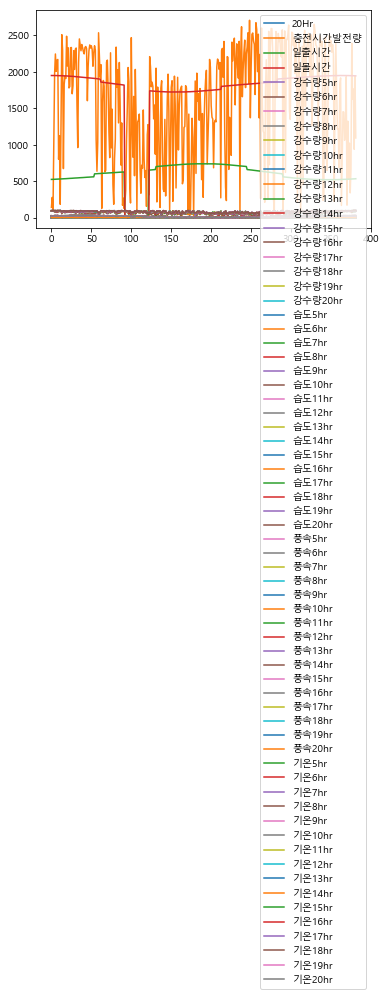

In [8]:
df.plot()

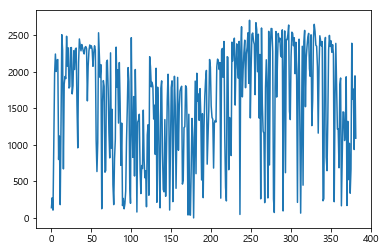

In [9]:
df['충전시간발전량'].plot()

In [10]:
# 합산 및 평균 기상데이터 컬럼 생성.
df['하루 총 강수량'] = df.iloc[:,3:19].sum(axis=1)
df['하루 평균 습도'] = df.iloc[:,19:35].mean(axis=1)
df['하루 평균 풍속'] = df.iloc[:,35:51].mean(axis=1)
df['하루 평균 기온'] = df.iloc[:,51:(51+15+1)].mean(axis=1)
df.head()

,20Hr,충전시간발전량,일출시간,일몰시간,강수량5hr,강수량6hr,강수량7hr,강수량8hr,강수량9hr,강수량10hr,강수량11hr,강수량12hr,강수량13hr,강수량14hr,강수량15hr,강수량16hr,강수량17hr,강수량18hr,강수량19hr,강수량20hr,습도5hr,습도6hr,습도7hr,습도8hr,습도9hr,습도10hr,습도11hr,습도12hr,습도13hr,습도14hr,습도15hr,습도16hr,습도17hr,습도18hr,습도19hr,습도20hr,풍속5hr,풍속6hr,풍속7hr,풍속8hr,풍속9hr,풍속10hr,풍속11hr,풍속12hr,풍속13hr,풍속14hr,풍속15hr,풍속16hr,풍속17hr,풍속18hr,풍속19hr,풍속20hr,기온5hr,기온6hr,기온7hr,기온8hr,기온9hr,기온10hr,기온11hr,기온12hr,기온13hr,기온14hr,기온15hr,기온16hr,기온17hr,기온18hr,기온19hr,기온20hr,하루 총 강수량,하루 평균 습도,하루 평균 풍속,하루 평균 기온
0,0,140.5,524,1949,3.200000,15.7,4.7,0.0,0.0,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.3,2.1,1.0,0.0,93.0,94.0,95.0,95.0,94.0,93.0,92.0,91.0,90.0,91.0,92.0,93.0,94.0,94.0,95.0,96.0,4.3,2.5,2.7,1.8,2.6,2.4,3.0,1.9,1.5,1.7,3.0,3.7,4.4,5.6,4.9,4.8,22.600000,22.200001,22.299999,23.900000,24.500000,24.299999,24.100000,23.6,24.299999,24.200001,24.700001,24.500000,24.200001,22.799999,22.400000,22.200001,1976.300000,87.2500,8.87500,22.46250
1,0,276.8,524,1949,16.799999,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.1,0.0,0.0,96.0,96.0,94.0,93.0,95.0,94.0,95.0,96.0,95.0,96.0,95.0,95.0,90.0,96.0,95.0,96.0,1.6,1.6,3.0,4.9,5.1,2.9,1.3,0.5,1.1,3.5,2.2,1.5,2.6,1.6,1.6,0.3,22.799999,22.799999,23.200001,22.299999,21.200001,21.299999,20.299999,21.0,21.000000,20.400000,20.400000,20.600000,19.900000,20.700001,20.100000,20.000000,1969.899999,88.8125,8.18750,19.89375
2,0,107.8,525,1948,0.000000,2.5,8.2,5.5,1.7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,92.0,94.0,95.0,95.0,96.0,96.0,95.0,95.0,95.0,95.0,96.0,96.0,96.0,96.0,96.0,96.0,3.2,1.9,2.0,3.7,2.7,2.2,1.0,1.2,0.7,1.3,1.9,0.6,0.5,0.4,0.2,0.1,21.200001,21.000000,20.700001,20.500000,21.000000,20.799999,21.000000,21.4,21.700001,22.000000,22.100000,22.100000,22.200001,22.299999,22.200001,22.299999,1967.100000,89.2500,7.46875,20.14375
3,0,1012.9,525,1948,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88.0,87.0,86.0,90.0,91.0,92.0,94.0,95.0,96.0,96.0,95.0,95.0,96.0,96.0,96.0,96.0,2.5,1.3,2.5,2.7,0.9,1.7,2.1,0.9,0.8,0.7,0.4,0.1,0.6,0.4,0.3,0.9,24.900000,26.000000,26.400000,24.700001,24.799999,23.900000,23.799999,23.6,23.600000,23.000000,22.900000,22.700001,22.700001,22.799999,22.600000,22.500000,1948.000000,87.0625,7.11875,22.45625
4,0,1975.6,526,1948,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7,0.2,81.0,81.0,83.0,81.0,83.0,87.0,90.0,91.0,92.0,94.0,94.0,95.0,95.0,94.0,95.0,96.0,3.0,2.8,3.2,3.5,3.9,2.7,2.2,3.0,2.2,3.0,3.6,2.6,2.3,1.2,3.0,1.4,27.500000,27.700001,26.799999,27.900000,27.000000,26.400000,25.900000,25.6,24.900000,24.900000,24.500000,23.600000,24.400000,24.600000,24.500000,24.400000,1948.700000,83.5125,8.63750,24.22500


In [11]:
df.tail(100)

,20Hr,충전시간발전량,일출시간,일몰시간,강수량5hr,강수량6hr,강수량7hr,강수량8hr,강수량9hr,강수량10hr,강수량11hr,강수량12hr,강수량13hr,강수량14hr,강수량15hr,강수량16hr,강수량17hr,강수량18hr,강수량19hr,강수량20hr,습도5hr,습도6hr,습도7hr,습도8hr,습도9hr,습도10hr,습도11hr,습도12hr,습도13hr,습도14hr,습도15hr,습도16hr,습도17hr,습도18hr,습도19hr,습도20hr,풍속5hr,풍속6hr,풍속7hr,풍속8hr,풍속9hr,풍속10hr,풍속11hr,풍속12hr,풍속13hr,풍속14hr,풍속15hr,풍속16hr,풍속17hr,풍속18hr,풍속19hr,풍속20hr,기온5hr,기온6hr,기온7hr,기온8hr,기온9hr,기온10hr,기온11hr,기온12hr,기온13hr,기온14hr,기온15hr,기온16hr,기온17hr,기온18hr,기온19hr,기온20hr,하루 총 강수량,하루 평균 습도,하루 평균 풍속,하루 평균 기온
282,0,1655.3,609,1859,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73.0,72.0,75.0,73.0,68.0,64.0,59.0,54.0,50.0,50.0,47.0,45.0,48.0,48.0,50.0,52.0,4.7,5.1,6.0,5.3,5.8,6.1,5.9,5.1,4.2,3.6,3.1,5.8,4.8,4.8,4.8,4.2,16.100000,15.500000,14.100000,13.400000,13.300000,13.200000,13.100000,13.200000,13.200000,13.100000,13.200000,13.200000,13.000000,12.800000,12.700000,12.600000,1859.0,54.75000,7.94375,12.95625
283,0,2161.9,608,1900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.1,0.8,1.4,1.4,0.5,1.0,1.0,52.0,59.0,65.0,65.0,72.0,72.0,72.0,73.0,84.0,87.0,88.0,87.0,87.0,86.0,88.0,85.0,3.7,4.3,4.4,4.5,4.0,2.9,3.2,2.2,1.0,2.3,3.3,4.0,3.6,4.5,5.3,4.8,16.100000,14.400000,13.500000,13.500000,12.600000,12.700000,12.600000,12.900000,11.700000,11.200000,11.300000,10.900000,10.100000,9.900000,10.100000,10.200000,1906.2,71.12500,8.63750,11.76875
284,0,2526.4,607,1901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,60.0,63.0,58.0,55.0,54.0,52.0,51.0,45.0,39.0,36.0,36.0,33.0,32.0,28.0,28.0,6.0,6.4,6.6,4.0,3.6,5.4,5.2,6.0,8.2,7.9,5.7,6.9,6.2,7.6,7.4,7.1,16.900000,15.700000,14.200000,13.800000,12.800000,12.400000,12.100000,12.100000,12.100000,12.100000,12.200000,11.900000,11.500000,11.300000,11.400000,11.100000,1901.0,43.25000,7.56875,12.47500
285,0,2414.0,606,1902,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,18.0,17.0,19.0,27.0,25.0,22.0,26.0,28.0,34.0,40.0,41.0,44.0,47.0,57.0,66.0,4.8,5.5,5.7,4.5,4.0,4.1,4.5,4.0,3.3,2.9,1.4,1.7,1.6,0.7,3.0,1.8,18.200001,17.200001,16.600000,15.100000,13.000000,12.200000,11.000000,10.900000,10.800000,10.700000,9.000000,8.800000,8.100000,7.700000,9.200000,8.300000,1902.0,29.31250,7.35625,11.26875
286,0,2461.7,604,1902,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46.0,50.0,54.0,59.0,60.0,59.0,63.0,64.0,59.0,62.0,58.0,64.0,71.0,70.0,67.0,75.0,4.7,5.3,4.6,3.9,4.4,3.8,1.4,1.4,2.3,1.1,0.6,0.4,0.6,0.2,1.1,0.4,17.400000,16.100000,14.800000,13.600000,13.000000,13.000000,12.400000,12.000000,12.100000,11.300000,11.300000,9.100000,8.000000,7.000000,8.000000,7.300000,1902.0,56.62500,6.92500,11.21875
287,0,2223.1,603,1903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,55.0,57.0,64.0,67.0,70.0,70.0,71.0,72.0,74.0,76.0,77.0,84.0,87.0,89.0,90.0,2.4,3.8,5.0,4.3,4.2,1.2,0.5,1.7,2.5,4.2,3.8,3.2,4.4,2.8,3.0,3.6,19.600000,18.900000,17.900000,16.000000,15.100000,14.400000,14.600000,14.000000,14.800000,15.400000,14.700000,14.300000,14.500000,14.200000,13.800000,15.000000,1903.0,66.68750,8.56250,14.73750
288,0,2203.8,602,1904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76.0,78.0,79.0,82.0,86.0,90.0,93.0,93.0,92.0,91.0,92.0,94.0,95.0,95.0,95.0,96.0,2.7,3.0,2.4,2.1,1.6,1.5,2.0,1.1,1.2,0.6,0.6,0.8,1.4,1.5,0.3,1.6,19.799999,19.500000,19.200001,17.000000,16.200001,15.700000,15.100000,15.300000,15.000000,15.300000,15.000000,14.800000,14.200000,14.100000,13.800000,13.400000,1904.0,83.18750,7.42500,15.10000
289,0,2575.4,600,1905,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.2,0.2,0.0,77.0,83.0,90.0,95.0,96.0,96.0,95.0,95.0,95.0,94.0,94.0,94.0,94.0,94.0,94.0,96.0,3.3,2.9,2.8,3.1,2.9,3.0,1.8,1.6,1.8,2.1,1.9,2.7,3.0,3.6,2.7,2.2,16.200001,15.400000,14.200000,13.600000,13.300000,13.600000,13.400000,13.600000,14.000000,14.300000,14.300000,14.700000,15.000000,15.700000,15.800000,16.000000,1906.0,86.62500,8.45000,13.70625
290,0,96.1,559,1906,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94.0,94.0,92.0,90.0,87.0,86.0,86.0,84.0,

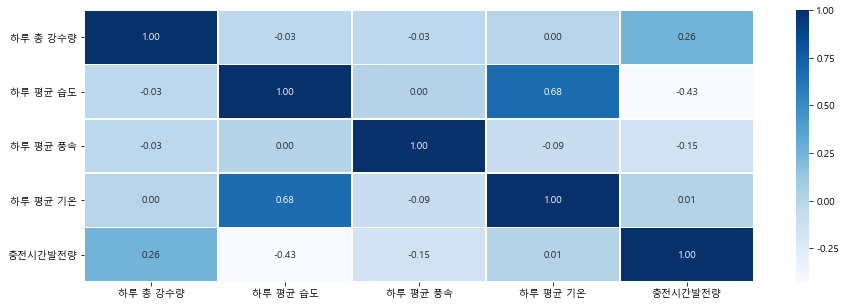

In [12]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

attribs = ['하루 총 강수량', '하루 평균 습도', '하루 평균 풍속', '하루 평균 기온', '충전시간발전량']
corr = df[attribs].corr()

plt.figure(figsize=(15,5))
sns.heatmap(corr, annot=True, fmt='.2f', linewidths=.5, cmap='Blues')

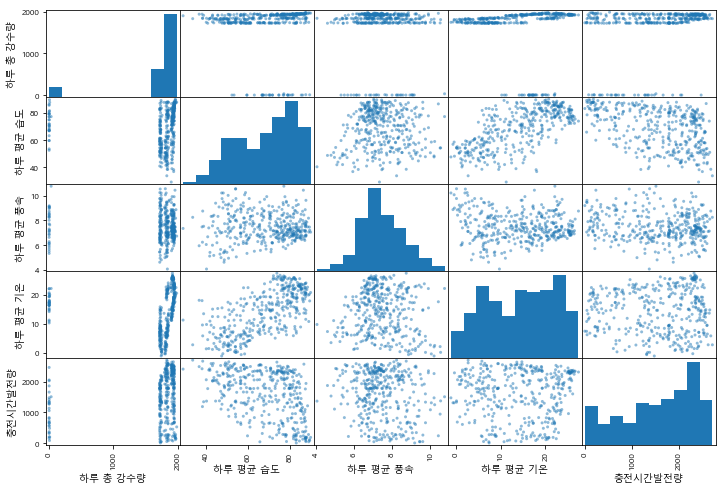

In [13]:
from pandas.plotting import scatter_matrix

scatter_matrix(df[attribs], figsize=(12, 8))
plt.show()

In [19]:
# 손실 이력 클래스 정의
class LossHistory(keras.callbacks.Callback):
    def init(self):
        self.losses = []
        
    def on_epoch_end(self, batch, logs={}): 
        self.losses.append(logs.get('loss'))


In [20]:
scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()

x = df.drop(columns='충전시간발전량')
x = x.iloc[:,66:]
scaler_X.fit(x)
x = pd.DataFrame(scaler_X.transform(x), index=x.index, columns=x.columns)

y = df[['충전시간발전량']]
scaler_Y.fit(y)
y = pd.DataFrame(scaler_Y.transform(y), index=y.index, columns=y.columns)


* ~~#10시 ~ 16시 까지(7시간)의 발전량을 합한것이 충전시간발전량이므로, window_size는 7.~~  아니었다.
* MINMAX 처리 이전으로 데이터를 돌려서 확인해보니, 7의 의미는 7일 임이 밝혀짐.
* df.shift를 쓰지않고 window 생성한 코드구만.

In [21]:
def dataset_reshape(dataset, window_size=1):
    data = []
    for i in range(len(dataset) - window_size - 1):
        change_data = dataset[i:(i+window_size)]  #한칸씩 밀려남.
        data.append(np.array(change_data))       
    return np.array(data)

# 80%는 train데이터로, 나머지는 test 데이터로.
x_train = x[:int(len(x) * 80 / 100)]
y_train = y[:int(len(y) * 80 / 100)]
x_test = x[int(len(x) * 80 / 100) :]
y_test = y[int(len(y) * 80 / 100) :]

x_train = dataset_reshape(x_train, 7)   
y_train = dataset_reshape(y_train['충전시간발전량'], 7)
x_test = dataset_reshape(x_test, 7)
y_test = dataset_reshape(y_test['충전시간발전량'], 7)


print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(297, 7, 5)
(297, 7)
(69, 7, 5)
(69, 7)


In [22]:
x_train[0]

array([[0.85079368, 0.99461229, 0.95764463, 0.71641791, 0.82617273],
       [0.78095238, 0.99138973, 0.98347107, 0.61380597, 0.73608066],
       [0.85396822, 0.98997986, 0.99070248, 0.50652985, 0.74484875],
       [0.86031746, 0.98036254, 0.95454545, 0.45429104, 0.82595353],
       [0.92063492, 0.98071501, 0.89586777, 0.68097015, 0.88798772],
       [0.85079368, 0.98036254, 0.91012397, 0.49906716, 0.86935554],
       [0.89841273, 0.98036254, 0.90599174, 0.4738806 , 0.84502412]])

In [23]:
model65.summary()

NameError: name 'model65' is not defined

In [24]:
# 모델 생성
model65 = Sequential()
model65.add(LSTM(100, input_shape = (7, 4)))
model65.add(Dense(7))

model65.compile(loss='mean_squared_error', 
                optimizer='adam', metrics=['accuracy'])

# 손실 이력 객체 생성
history = LossHistory() 
history.init()

hist = model65.fit(x_train, y_train, epochs=40, batch_size=14, verbose=2, validation_data=(x_test, y_test), callbacks=[history])
print("Training Done! loss : %.4f  val_loss : %.4f"%(hist.history['loss'][-1],hist.history['val_loss'][-1]))

ValueError: Error when checking input: expected lstm_1_input to have shape (7, 4) but got array with shape (7, 5)

In [25]:
plt.figure(figsize=(10,7))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylim(0.02,0.15)

plt.show()

NameError: name 'hist' is not defined

<Figure size 720x504 with 0 Axes>

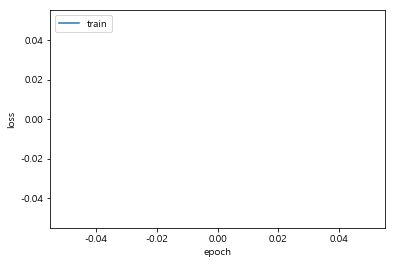

ValueError: Error when checking input: expected lstm_1_input to have shape (7, 4) but got array with shape (7, 5)

In [26]:
# 학습 시각화
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

model65.evaluate(x_test, y_test)
yhat = model65.predict(x_test)
rmse = sqrt(mean_squared_error(y_test, yhat))
print('Test RMSE: %.3f' % rmse)

NameError: name 'yhat' is not defined

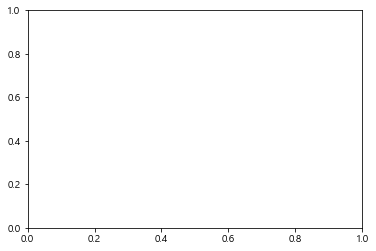

In [27]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()


y_test_tuple = (y_test[0], y_test[1], y_test[2], y_test[3], 
                y_test[4], y_test[5], y_test[6])
y_hat_tuple = (yhat[0], yhat[1], yhat[2], 
               yhat[3], yhat[4], yhat[5], yhat[6])
acc_ax = loss_ax.twinx()
y_value = y['충전시간발전량'][-len(yhat):]
loss_ax.plot(np.concatenate(y_test_tuple), 'b', label='act')
# loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(np.concatenate(y_hat_tuple), 'r', label='pred')

# acc_ax.legend(loc='lower left')
loss_ax.legend(loc='upper right')

plt.show()


In [28]:
(y_test[0], y_test[1])

(array([0.72971175, 0.88847007, 0.69822616, 0.07856615, 0.74700665,
        0.90436068, 0.46751663]),
 array([0.88847007, 0.69822616, 0.07856615, 0.74700665, 0.90436068,
        0.46751663, 0.02416851]))

In [29]:
split_date = pd.Timestamp('29-04-2017')

train = df.loc[:split_date, ['충전시간발전량']]
test = df.loc[split_date:, ['충전시간발전량']]

# train = df.loc[:split_date]
# test = df.loc[split_date:]

#Feature는 Unadjusted 한 개
ax = train.plot()
test.plot(ax=ax)  #text plot은 train plot과 축을 같게 맞춘다는 말인듯.
plt.legend(['train', 'test'])

TypeError: Cannot compare type 'Timestamp' with type 'int'

In [30]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

train_sc_df = pd.DataFrame(train_sc, columns = ['Scaled'], index = train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['Scaled'], index=test.index)

NameError: name 'train' is not defined

In [31]:
train_sc

NameError: name 'train_sc' is not defined

In [32]:
train_sc_df.head()

NameError: name 'train_sc_df' is not defined

In [33]:
for s in range(1,13):
    train_sc_df['shift_{}'.format(s)] = train_sc_df['Scaled'].shift(s)
    test_sc_df['shift_{}'.format(s)] = test_sc_df['Scaled'].shift(s)

NameError: name 'train_sc_df' is not defined

In [34]:
train_sc_df

NameError: name 'train_sc_df' is not defined

In [35]:
X_train = train_sc_df.dropna().drop('Scaled', axis=1)
y_train = train_sc_df.dropna()[['Scaled']]

X_test = test_sc_df.dropna().drop('Scaled', axis = 1)
y_test = test_sc_df.dropna()[['Scaled']]

NameError: name 'train_sc_df' is not defined

In [36]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

NameError: name 'X_train' is not defined

In [37]:
X_train_t = X_train.reshape(X_train.shape[0], 12, 1)
X_test_t = X_test.reshape(X_test.shape[0], 12, 1)

NameError: name 'X_train' is not defined

In [38]:
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping

In [39]:
K.clear_session()

#Linear stack of layers.
model = Sequential()  # Sequential Model

#Adds a layer instance on top of the layer stack.
#LSTM : Long Short-Term Memory layer  / 20: NN의 노드 개수
model.add(LSTM(50, input_shape=(12,1)))  # (timestep, feature)
#Dense : Just your regular densely-connected NN layer.
model.add(Dense(1))   # output = 1

#Configures the model for training. 학습 모델 설정
model.compile(loss = 'mean_squared_error', optimizer='adam')

#Trains the model for a given number of epochs (iterations on a dataset).
# batch_size = Number of samples per gradient update.
model.fit(X_train_t, y_train, epochs = 100, batch_size=30, verbose = 1)

#Generates output predictions for the input samples.
y_pred = model.predict(X_test_t)

NameError: name 'X_train_t' is not defined

NameError: name 'y_pred' is not defined

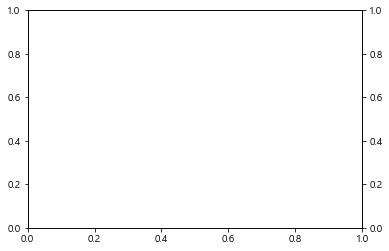

In [40]:
import matplotlib.pyplot as plt

fig,loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()  #Create a twin Axes sharing the x-axis
pred = y_pred

loss_ax.plot(pred, 'b', label='pred')
loss_ax.plot(y_test, 'r', label='act')
loss_ax.legend(loc = 'upper left')

plt.show() #결과